# Data Visualization

 This notebook aims to reveal meaningful insights by applying various visualization and feature engineering techniques on the Toxic Comments Challenge dataset. 
 
** Visualizations:
** 
 1. Categorical spread of overall data
 2. Categorical spread of toxic data
 3. Tagging of various sentences

In [38]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn

train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [39]:
# Basic Tabular description of the Training dataset used here
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#Inserting a num_words column into dataframe

train_df["num_words"] = train_df["comment_text"].apply(lambda x:len(str(x).split()))
test_df["num_words"] = test_df["comment_text"].apply(lambda x:len(str(x).split()))

train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,num_words
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,67.273527
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,99.230702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1411.000000


In [41]:
#Checking on the first few rows of the dataframe
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,num_words
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,43
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,17
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,113
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,13


## Distribution of data 

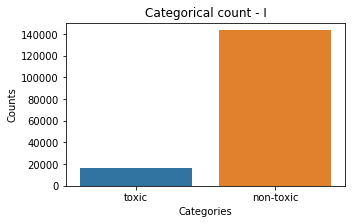

In [59]:
#Code block to visualize the number of total toxic comments of any category and non-toxic comments
train_df["toxicity_score"] = train_df.iloc[:,2:-2].sum(axis=1)
types = ["toxic", "non-toxic"]
toxic_count = len(train_df[train_df["toxicity_score"]>0])
nontoxic_count = train_df.shape[0]-toxic_count
comments_count = [toxic_count, nontoxic_count]

x_locs = [counter for counter,_ in enumerate(toxicity_types)]
plt.figure(figsize=(5,3))
ax = sns.barplot(types, comments_count)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Categorical count - I')
plt.show()

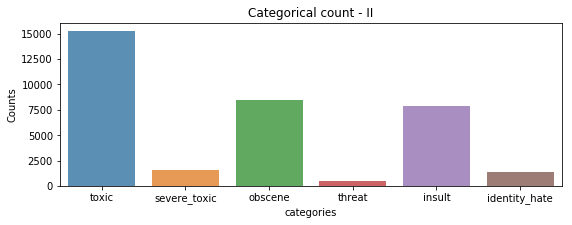

In [64]:
counts = train_df.iloc[:,2:-2].sum(axis=0)
counts_values = counts.values
categories = counts.index.values

plt.figure(figsize=(9,3))
ax = sns.barplot(categories, counts_values, alpha = 0.8)
plt.xlabel('categories')
plt.ylabel('Counts')
plt.title('Categorical count - II')
plt.show()

We see that a very little section of the entire dataset is actually toxic and that further, the toxic comments are not evenly spread out across the several categories.